<a href="https://colab.research.google.com/github/Bor-Cherng/Bor-Cherng-SQL-Python-Projects/blob/main/8_Analyzing_Online_Sports_Revenue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

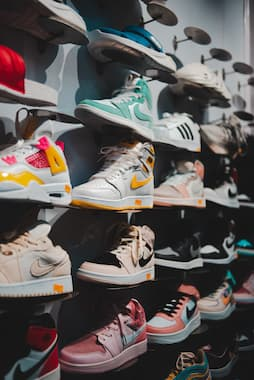

Sports clothing and athleisure attire is a huge industry, worth approximately [$193 billion in 2021](https://www.statista.com/statistics/254489/total-revenue-of-the-global-sports-apparel-market/) with a strong growth forecast over the next decade!

In this notebook, you will undertake the role of a product analyst for an online sports clothing company. The company is specifically interested in how it can improve revenue. You will dive into product data such as pricing, reviews, descriptions, and ratings, as well as revenue and website traffic, to produce recommendations for its marketing and sales teams.  

You've been provided with four datasets to investigate:

#  brands.csv

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `brand` | Brand of the product |

# finance.csv

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `listing_price` | Original price of the product |
| `sale_price` | Discounted price of the product |
| `discount` | Discount off the listing price, as a decimal |
| `revenue` | Revenue generated by the product |

# info.csv

| Columns | Description |
|---------|-------------|
| `product_name` | Name of the product |
| `product_id` | Unique product identifier |
| `description` | Description of the product |

# reviews.csv

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `rating` | Average product rating |
| `reviews` | Number of reviews for the product |

In [ ]:
import pandas as pd

brands = pd.read_csv("brands.csv")
finance = pd.read_csv("finance.csv")
info = pd.read_csv("info.csv")
reviews = pd.read_csv("reviews.csv")
brands.head()
finance.head()
info.head()
reviews.head()

# What is the volume of products and average revenue for Adidas and Nike products based on listing price quartiles?

import pandas as pd
# Merge brands and finance data on product_id
merged_df = pd.merge(brands, finance, on='product_id')
merged_df.dropna(inplace=True)

# Calculate the quartiles for listing_price
quartiles = merged_df['listing_price'].quantile([0.25,0.5,0.75])

# Define a function to categorize products based on listing_price quartiles
def price_label(price):
    if price <= quartiles[0.25]:
        return 'Budget'
    elif price <= quartiles[0.5]:
        return 'Average'
    elif price<= quartiles[0.75]:
        return 'Expensive'
    else:
        return 'Elite'

# Apply the price_label function to the dataframe
merged_df['price_label'] = merged_df['listing_price'].apply(price_label)

# Group by brand and price_label to calculate the number of products and mean revenue
grouped = merged_df.groupby(['brand','price_label'], as_index=False).agg(
num_products =('product_id','size'),
mean_revenue =('revenue','mean')
)

# Round the numeric values to two decimal places
grouped['mean_revenue'] = grouped['mean_revenue'].round(2)
grouped['num_products'] = grouped['num_products'].round(2)

# Filter for Adidas and Nike only
adidas_vs_nike = grouped[grouped['brand'].isin(['Adidas','Nike'])]

print(adidas_vs_nike)


# Do any differences exist between the word count of a product's description and its mean rating?
#info.head()
import pandas as pd
info = pd.read_csv('info.csv')
reviews = pd.read_csv('reviews.csv')

merged_df1 = pd.merge(info, reviews, on = 'product_id')

merged_df1['description_length'] = merged_df1['description'].str.len()

lengthes = [0,100,200,300,400,500,600,700]

labels = ['100','200','300','400','500','600','700']

merged_df1['description_length'] = pd.cut(merged_df1['description_length'], bins= lengthes, labels= labels)

description_lengths = merged_df1.groupby('description_length', as_index=False).agg(
    mean_rating = ('rating','mean'),
    num_reviews = ('reviews','count')
).round(2)

print(description_lengths)

    brand price_label  num_products  mean_revenue
0  Adidas     Average           655       3035.30
1  Adidas      Budget           574       2015.68
2  Adidas       Elite           587       8302.78
3  Adidas   Expensive           759       4621.56
4    Nike     Average             8        675.59
5    Nike      Budget           360       1654.40
6    Nike       Elite           130       1367.45
7    Nike   Expensive            47        500.56
  description_length  mean_rating  num_reviews
0                100         2.26            7
1                200         3.19          526
2                300         3.28         1785
3                400         3.29          651
4                500         3.35          118
5                600         3.12           15
6                700         3.65           15
